In [1]:
from typing import List, Dict, TypedDict
from langgraph.graph import StateGraph

In [2]:
class StateAgent(TypedDict):
    name: str
    age : int
    skills: List[str]
    final_result:str


In [3]:
def first_node(state: StateAgent) -> StateAgent:
    """this is the first node of the sequence"""
    state["final_result"] = f"Hi {state["name"]}!"
    return state


def second_node(state: StateAgent) -> StateAgent:
    """this is the second node of the sequence"""
    state["final_result"] = state["final_result"] + f"You are {state["age"]} years old and "
    return state

def third_node(state: StateAgent) -> StateAgent:
    """this is the third node of the sequence"""
    state["final_result"] = state["final_result"] + f"these are your skills :- {','.join(state["skills"])}"
    return state


In [4]:
graph = StateGraph(StateAgent)

graph.add_node("personalise", first_node)
graph.add_node("age_description", second_node)
graph.add_node("skill_preview", third_node)

graph.set_entry_point("personalise")
graph.add_edge("personalise","age_description")
graph.add_edge("age_description","skill_preview")
graph.set_finish_point("skill_preview")

app = graph.compile()

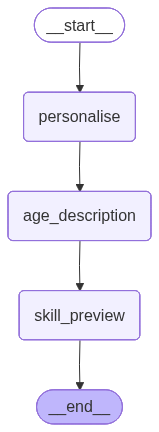

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"name":"Ruveen", "age":23, "skills":["ML","AI", "DS"]})

In [7]:
result["final_result"]

'Hi Ruveen!You are 23 years old and these are your skills :- ML,AI,DS'